### H(z) Reconstrution via Gaussian Process (GP)

In [2]:
#===== GaPP kernel for measuring H0 from H(z) data
# Author: Carlos Bengaly
# contact; carlosap87@gmail.com
# NOTE: the gapp modules only work for python 2.7 atm!

# ======== important packages to be imported 
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import sys as sys

from gapp import gp, dgp, covariance
import pickle
import numpy as np
from numpy import array,concatenate,loadtxt,savetxt,zeros
import matplotlib.pyplot as plt
from matplotlib import rc
 
if __name__=="__main__":

    #======== loading cosmological data
    filename = 'Hz'
    (Z,dm,Sigma) = loadtxt('Hz35data.txt', skiprows=1, unpack='True')

    #======== Gaussian process: reconstructing H(z) from data, starting from zmin = 0 all the way to zmax from data 
    zmin = 0.
    zmax = np.max(Z)
    #g1 = dgp.DGaussianProcess(Z,dm,Sigma,covfunction=covariance.SquaredExponential,cXstar=(zmin,zmax,200))
    g1 = dgp.DGaussianProcess(Z,dm,Sigma,covfunction=covariance.DoubleSquaredExponential,cXstar=(zmin,zmax,200))
    #g1 = dgp.DGaussianProcess(Z,dm,Sigma,covfunction=covariance.Matern92,cXstar=(zmin,zmax,200))
    #g1 = dgp.DGaussianProcess(Z,dm,Sigma,covfunction=covariance.Matern72,cXstar=(zmin,zmax,200))
    #g1 = dgp.DGaussianProcess(Z,dm,Sigma,covfunction=covariance.Matern52,cXstar=(zmin,zmax,200))
    #g1 = dgp.DGaussianProcess(Z,dm,Sigma,covfunction=covariance.Matern32,cXstar=(zmin,zmax,200))
    #g1 = dgp.DGaussianProcess(Z,dm,Sigma,covfunction=(covariance.DoubleSquaredExponential, covariance.SquaredExponential),cXstar=(zmin,zmax,200))
    (rec1,theta1) = g1.gp(thetatrain='True')
    #(rec2,theta2) = g2.gp(thetatrain='True')
    #(rec3,theta3) = g3.gp(thetatrain='True')
    #(rec4,theta4) = g4.gp(thetatrain='True')
    #(rec5,theta5) = g5.gp(thetatrain='True')
    #(rec6,theta6) = g6.gp(thetatrain='True')
    
    #====== reconstrucing the dH(z) and d2H(z) from data - not necessary when measuring H0
    (drec,theta) = g1.dgp(thetatrain='True')
    #(d2rec,theta) = g.d2gp()

    #===== creating variables to receive the GP reconstructed Hz 
    zrec = rec1[:,0]
    hzrec = rec1[:,1]
    sighzrec = rec1[:,2]
    
    # ======= printing the reconstructed H(z) at the lowest point, i.e., zmin=0, and its relative uncertainty 
    print 'z=', zrec[0], ' H0=', hzrec[0], ' sigH0=',  sighzrec[0], ' sigH0/H0 (%)=', (sighzrec[0]/hzrec[0])*100.
        
    # ========== saving the reconstructed hz and its derivatives
    savetxt("Hz35_rec_gapp.dat",rec1)
    #savetxt("ddm_rec.txt",drec)
    #savetxt("d2h_rec.txt",d2rec)


Optimized hyperparameters:
theta = [157.99282753   3.2249416   10.53111231   0.3723946 ]

Optimized hyperparameters:
theta = [157.99282753   3.2249416   10.53111231   0.3723946 ]
z= 0.0  H0= 66.95835644141951  sigH0= 6.061409818514948  sigH0/H0 (%)= 9.052506872413977


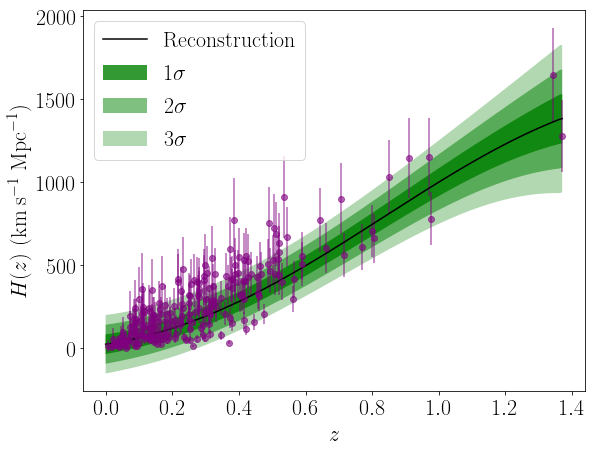

In [3]:
####################################################################################################
# ======= OPTIONAL: plotting the reconstructed hz curve
#latex rendering text fonts
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# ====== Create figure size in inches
fig, ax = plt.subplots(figsize = (9., 7.))

# ========= Define axes
ax.set_xlabel(r"$z$", fontsize=22)
ax.set_ylabel(r"$H(z)$ ($\mathrm{km} \; \mathrm{s}^{-1} \; \mathrm{Mpc}^{-1}$)", fontsize=22)
#plt.xlim(zmin, 2.4)
for t in ax.get_xticklabels(): t.set_fontsize(22)
for t in ax.get_yticklabels(): t.set_fontsize(22)

# ========== Plotting the real data points and reconstructed H(z) curves - from 1 to 3sigma
plt.errorbar(Z, dm, yerr=Sigma, fmt='o', color='purple', alpha=0.6)
ax.plot(zrec, hzrec, '-k')
ax.fill_between(zrec, hzrec+1.*sighzrec, hzrec-1.*sighzrec, facecolor='green', alpha=0.80, interpolate=True)
ax.fill_between(zrec, hzrec+2.*sighzrec, hzrec-2.*sighzrec, facecolor='green', alpha=0.50, interpolate=True)
ax.fill_between(zrec, hzrec+3.*sighzrec, hzrec-3.*sighzrec, facecolor='green', alpha=0.30, interpolate=True)
plt.legend((r"Reconstruction", "$1\sigma$", "$2\sigma$", "$3\sigma$"), fontsize='22', loc='best')
plt.show()

# =========== saving the plot
fig.savefig(filename+'_reconst.png')

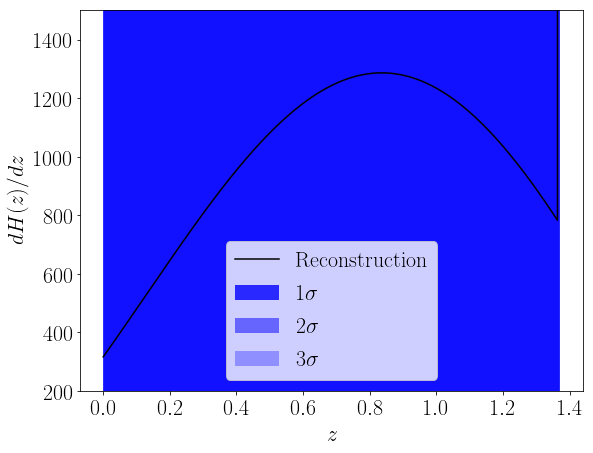

In [6]:
#===== creating variables to receive the GP reconstructed Hz 
dzrec = drec[:,0]
dhzrec = drec[:,1]
dsighzrec = drec[:,2]

####################################################################################################
# ======= OPTIONAL: plotting the reconstructed hz curve
#latex rendering text fonts
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# ====== Create figure size in inches
fig, ax = plt.subplots(figsize = (9., 7.))

# ========= Define axes
ax.set_xlabel(r"$z$", fontsize=22)
ax.set_ylabel(r"$dH(z)/dz$", fontsize=22)
#plt.xlim(zmin, 2.4)
for t in ax.get_xticklabels(): t.set_fontsize(22)
for t in ax.get_yticklabels(): t.set_fontsize(22)

# ========== Plotting the real data points and reconstructed H(z) curves - from 1 to 3sigma
ax.plot(dzrec, dhzrec, '-k')
ax.set_ylim(ymin=200, ymax=1500)
ax.fill_between(dzrec, dhzrec+1.*dsighzrec, dhzrec-1.*dsighzrec, facecolor='blue', alpha=0.80, interpolate=True)
ax.fill_between(dzrec, dhzrec+2.*dsighzrec, dhzrec-2.*dsighzrec, facecolor='blue', alpha=0.50, interpolate=True)
ax.fill_between(dzrec, dhzrec+3.*dsighzrec, dhzrec-3.*dsighzrec, facecolor='blue', alpha=0.30, interpolate=True)
plt.legend((r"Reconstruction", "$1\sigma$", "$2\sigma$", "$3\sigma$"), fontsize='22', loc='lower center')
plt.show()

# =========== saving the plot
fig.savefig(filename+'_deriv_reconst.png')